# Regressão Polinomial

## Imports

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functools import wraps
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

## Carregando Base de Dados

In [2]:
!rm -r MLUD
!git clone https://github.com/Crissky/MLUD.git

Cloning into 'MLUD'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 122 (delta 44), reused 35 (delta 4), pack-reused 0
Receiving objects: 100% (122/122), 206.29 KiB | 3.97 MiB/s, done.
Resolving deltas: 100% (44/44), done.


## Funções de Pré-Processamento

In [3]:
def loadDataset(filename):
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    return X, y, baseDeDados

def fillMissingData(X, inicioColuna, fimColuna):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    return X

#só funciona se i = 0 ou i = ultima coluna
def computeCategorization(X, i):
    labelencoder_X = LabelEncoder()
    X[:, i] = labelencoder_X.fit_transform(X[:, i])

    #one hot encoding
    D = pd.get_dummies(X[:,i]).values
    if(i == 0):
        X = X[:,1:]
        X = np.insert(X, 0, D, axis=1)

        #removendo dummy variable trap
        X = X[:,1:]
    else:
        X = X[:,:i]
        for j in range(0, D.shape[1]):
            X = np.insert(X, i, D[:,j], axis=1)

        #removendo dummy variable trap
        X = X[:,:-1]
    return X

def splitTrainTestSets(X, y, testSize):
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    return XTrain, XTest, yTrain, yTest

def computeScaling(train, test):
    scaleX = StandardScaler()
    train = scaleX.fit_transform(train)
    test = scaleX.fit_transform(test)
    return train, test

## Funções Auxiliares

In [4]:
def showPlot(X, y, linearRegressor):
    plt.scatter(X, y, color='r')
    plt.plot(X, linearRegressor.predict(X), color='b')
    plt.title('Comparando pontos reais com a reta gerada pela Regressão Linear')
    plt.xlabel('Experiência em anos')
    plt.ylabel('Salário')
    plt.show()

def showPlot2(XPoints, yPoints, XLine, yLine):
    plt.scatter(XPoints, yPoints, color='r')
    plt.plot(XLine, yLine, color='b')
    plt.title('Comparando pontos reais com a reta gerada pela Regressão Polinomial')
    plt.xlabel('Experiência em anos')
    plt.ylabel('Salário')
    plt.show()

## Regressão Linear

In [5]:
def computeLinearRegressionModel(X, y):
    regressor = LinearRegression()
    regressor.fit(X, y)

    return regressor

def runLinearRegressionExample(filename):
    start_time = time.time()
    X, y, csv = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print("Load Dataset: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = fillMissingData(X, 1, X.shape[1])
    elapsed_time = time.time() - start_time
    print("Fill Missing Data: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = computeCategorization(X, 0)
    elapsed_time = time.time() - start_time
    print("Compute Categorization: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.8)
    elapsed_time = time.time() - start_time
    print("Split Train Test sets: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    computeLinearRegressionModel(XTrain, yTrain)
    elapsed_time = time.time() - start_time
    print("Compute Linear Regression: %.2f" % elapsed_time, "segundos.")

In [6]:
runLinearRegressionExample("MLUD/Aula06/svbr.csv")

Load Dataset: 0.01 segundos.
Fill Missing Data: 0.00 segundos.
Compute Categorization: 0.00 segundos.
Split Train Test sets: 0.00 segundos.
Compute Linear Regression: 0.00 segundos.


## Regressão Polinomial

In [7]:
def computePolynomialLinearRegressionModel(X, y, d):
    polynomialFeatures = PolynomialFeatures(degree=d)
    XPoly = polynomialFeatures.fit_transform(X)

    polyLinearRegression = LinearRegression()
    polyLinearRegression.fit(XPoly, y)

    return XPoly, polyLinearRegression

def runPolynomialLinearRegressionExample(filename):
    start_time = time.time()
    X, y, csv = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print("Load Dataset: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    linearRegressor = computeLinearRegressionModel(X, y)
    elapsed_time = time.time() - start_time
    print("Compute Linear Regression: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    XPoly, polyLinearRegresor = computePolynomialLinearRegressionModel(X, y, 5)
    elapsed_time = time.time() - start_time
    print("Compute Polynomial Regression: %.2f" % elapsed_time, "segundos.")

    showPlot(X, y, linearRegressor)
    showPlot2(X, y, X, polyLinearRegresor.predict(XPoly))

    return XPoly

Load Dataset: 0.00 segundos.
Compute Linear Regression: 0.00 segundos.
Compute Polynomial Regression: 0.00 segundos.


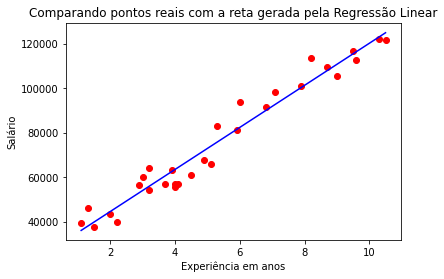

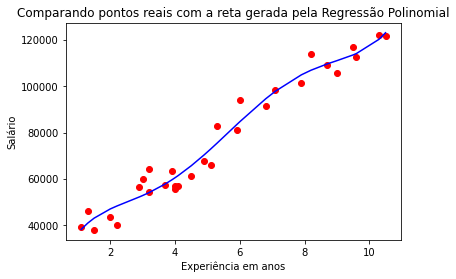

In [8]:
xp = runPolynomialLinearRegressionExample('MLUD/Aula07/salary.csv')

Load Dataset: 0.00 segundos.
Compute Linear Regression: 0.00 segundos.
Compute Polynomial Regression: 0.00 segundos.


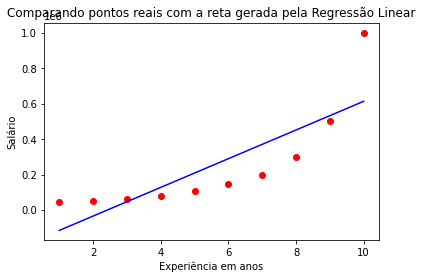

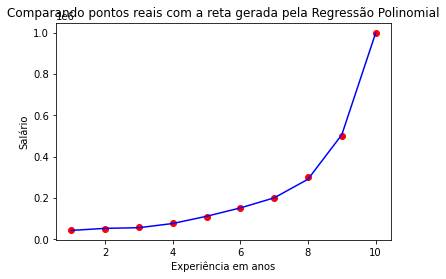

In [9]:
xp = runPolynomialLinearRegressionExample('MLUD/Aula07/salary2.csv')